<a href="https://colab.research.google.com/github/armandovl/devf_test_sensei/blob/main/devf_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importamos librerías de cajon
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1.- Compresión del negocio (problema)

<div style="text-align:justify;">
<br> Utilizando la base llamada "e" realizar un análisis descriptivo y exploratorio de la base de datos, encuentra y grafica cómo se distribuyen los visitantes, horas, días, etc... El análisis es libre, ¡sorpréndenos!

<br> Algo muy importante del dataset "e" es encontrar qué es lo que hace a un visitante y con ese hallazgo analizar el dataset "v".

<br> El dataset "v" es idéntico al "e" SOLO EN COLUMNAS, los datos en las filas son diferentes y fungen como datos completamente nuevos para el modelo. En consecuencia, “v” no tiene etiquetado si el usuario es visitante o no. Tu labor es añadirle la etiqueta de visitante (true/false). Por favor envíanos el csv con esta etiqueta.

<br>De igual manera envíanos los scripts que utilizaste para el análisis, comentando las acciones que realizaste para llegar al resultado.
</div>

## 2.- Comprensión de los datos


<p>

<br> **device_mac** se refiere al identificador único de un celular, cada célula asumimos es una persona
<br> **branch_office** es la sucursal de cliente
<br> **visitor** es una variable indicadora donde true significa que es visitante del lugar y false que no
<br> **tiempodeses** es el tiempo de la sesión (en segundos)


</p>

In [ ]:
url="https://raw.githubusercontent.com/armandovl/devf_test_sensei/main/datasets/e.csv"
datos_devf= pd.read_csv(url)
datos_devf.head(8)

,Unnamed: 0,device_mac,branch_office,month_tz,day_tz,day_of_week_tz,hour_tz,visitor,tiempodeses
0,1,00:00:00:6a:17:ce,1,11,2,Wednesday,0,True,2676
1,2,00:00:00:6a:17:ce,1,11,2,Wednesday,1,True,2676
2,3,00:00:00:6a:78:ae,1,10,30,Sunday,20,False,0
3,4,00:00:02:fa:9c:12,1,11,13,Sunday,12,True,2272
4,5,00:00:08:7d:e2:58,3,11,4,Friday,19,False,0
5,6,00:00:31:04:ad:89,3,11,3,Thursday,5,False,0
6,7,00:00:31:04:bc:da,2,11,4,Friday,19,False,0
7,8,00:00:77:34:37:30,3,11,5,Saturday,17,False,0


In [ ]:
datos_devf.shape #filas y las columnas

(249556, 9)

In [ ]:
datos_devf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249556 entries, 0 to 249555
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      249556 non-null  int64 
 1   device_mac      249556 non-null  object
 2   branch_office   249556 non-null  int64 
 3   month_tz        249556 non-null  int64 
 4   day_tz          249556 non-null  int64 
 5   day_of_week_tz  249556 non-null  object
 6   hour_tz         249556 non-null  int64 
 7   visitor         249556 non-null  bool  
 8   tiempodeses     249556 non-null  int64 
dtypes: bool(1), int64(6), object(2)
memory usage: 15.5+ MB


## 3.- Preparación de los datos

In [ ]:
datos_devf=datos_devf.drop(['Unnamed: 0',"device_mac"],axis=1) #quitamos columnas que no son relevantes

In [ ]:
#ponemos nombres más significativos
datos=datos_devf.rename(columns={
                      'branch_office':'numero_sucursal',
                      'month_tz':'mes',
                      'day_of_week_tz':'dia_semana',
                      'day_tz':'numero_dia',
                      'hour_tz':'hora_del_dia',
                      'visitor':'visitante',
                      'tiempodeses':'segundos_pasa',
                       })
datos

,numero_sucursal,mes,numero_dia,dia_semana,hora_del_dia,visitante,segundos_pasa
0,1,11,2,Wednesday,0,True,2676
1,1,11,2,Wednesday,1,True,2676
2,1,10,30,Sunday,20,False,0
3,1,11,13,Sunday,12,True,2272
4,3,11,4,Friday,19,False,0
...,...,...,...,...,...,...,...
249551,1,11,30,Wednesday,11,True,50152
249552,1,11,30,Wednesday,12,True,50152
249553,1,11,30,Wednesday,14,True,50152
249554,1,11,30,Wednesday,15,True,50152


Vemos que la mayoría de variables son categóricas, la única cuantitativa es la variable "segundos_pasa", así que lo transformamos

In [ ]:
datos['numero_sucursal'] = datos['numero_sucursal'].astype('category')
datos['mes'] = datos['mes'].astype('category')
datos['dia_semana'] = datos['dia_semana'].astype('category')
datos['hora_del_dia'] = datos['hora_del_dia'].astype('category')
datos['visitante'] = datos['visitante'].astype('category')
datos['numero_dia'] = datos['numero_dia'].astype('category')

In [ ]:
#estadísticos descriptivos
agrupados_datos =datos.groupby('visitante')
agrupados_datos.describe().round(1).transpose()

visitante               False     True
segundos_pasa count  164312.0  85244.0
              mean        4.4   6943.8
              std        18.1  12586.7
              min         0.0      0.0
              25%         0.0    368.8
              50%         0.0   1603.0
              75%         0.0   6941.5
              max      1715.0  68062.0

de entrada nos damos cuenta que los segundos que pasan los visitantes es mucho mayor que el de los que no son visitantes

In [ ]:
#estadísticos descriptivos
agrupados_datos =datos.groupby(['visitante','dia_semana'])
agrupados_datos.describe().round(1).transpose()

visitante              False                    ...     True                   
dia_semana            Friday   Monday Saturday  ... Thursday  Tuesday Wednesday
segundos_pasa count  16872.0  24934.0  18236.0  ...  13822.0  13515.0   15696.0
              mean       4.6      4.6      4.0  ...   7181.5   6942.1    6826.7
              std       20.8     17.8     18.7  ...  13344.6  12519.6   12038.4
              min        0.0      0.0      0.0  ...      0.0      0.0       0.0
              25%        0.0      0.0      0.0  ...    362.2    359.5     361.0
              50%        0.0      0.0      0.0  ...   1560.0   1556.0    1599.0
              75%        0.0      0.0      0.0  ...   7295.0   6671.5    7037.8
              max     1715.0    315.0   1159.0  ...  68048.0  67999.0   64460.0

[8 rows x 14 columns]

vemos que es dificil ver los números a traves de una tabla

In [ ]:
#filtramos la base entre visitantes y no visitantes
datos_cliente =datos[datos.visitante==True]
datos_no_cliente =datos[datos.visitante==False]

Text(0.5, 1.0, 'Conexiones de Generales')

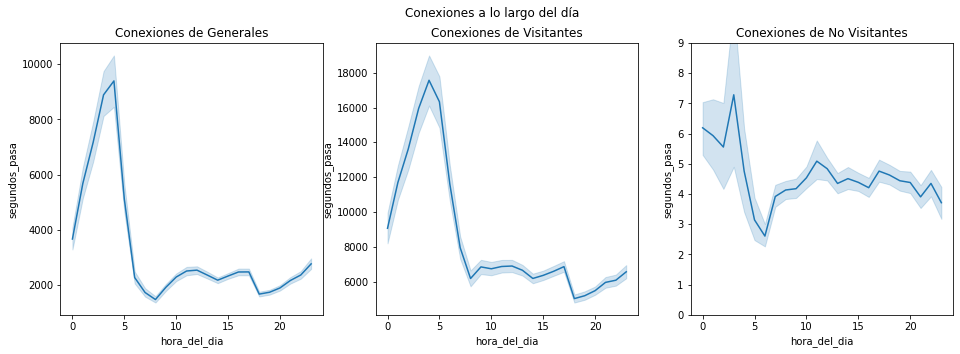

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharey=False)
fig.suptitle('Conexiones a lo largo del día')


sns.lineplot(x="hora_del_dia", y="segundos_pasa",ax=axes[0],
             data= datos)

sns.lineplot(x="hora_del_dia", y="segundos_pasa",ax=axes[1],
             data= datos_cliente)


sns.lineplot(x="hora_del_dia", y="segundos_pasa",ax=axes[2],
             data= datos_no_cliente)

axes[2].set_ylim(0,9)

axes[2].set_title("Conexiones de No Visitantes")
axes[1].set_title("Conexiones de Visitantes")
axes[0].set_title("Conexiones de Generales")

Podemos ver que la distribución de la hora en que estan a lo largo del día  sí se diferencia entre visitantes y no visitantes

Text(0.5, 1.0, 'Conexiones de Generales')

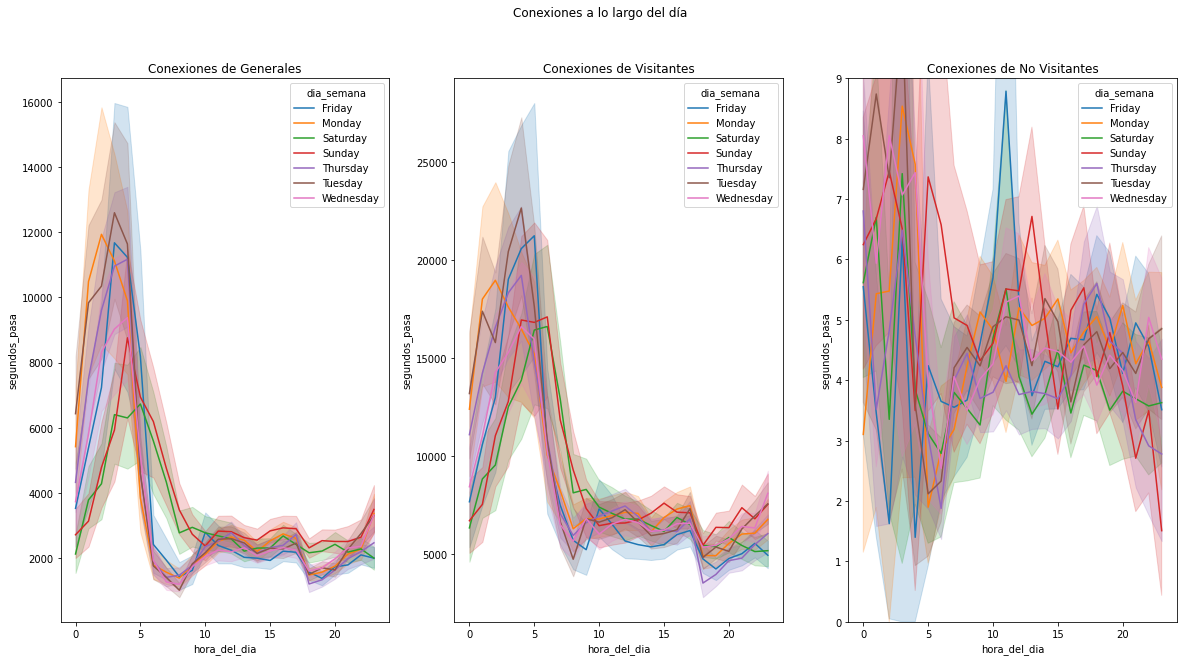

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10), sharey=False)
fig.suptitle('Conexiones a lo largo del día')


sns.lineplot(x="hora_del_dia", y="segundos_pasa",ax=axes[0],ci=0,
             data= datos, hue="dia_semana")

sns.lineplot(x="hora_del_dia", y="segundos_pasa",ax=axes[1],ci=0,
             data= datos_cliente, hue="dia_semana")


sns.lineplot(x="hora_del_dia", y="segundos_pasa",ax=axes[2],ci=0,
             data= datos_no_cliente, hue="dia_semana")

axes[2].set_ylim(0,9)

axes[2].set_title("Conexiones de No Visitantes")
axes[1].set_title("Conexiones de Visitantes")
axes[0].set_title("Conexiones de Generales")

Por día de la semana más la hora es dificil distinguir con exactitud pero se puede notar que el día viernes después de las 10 destaca para los No visitantes en comparación con los demás, sin embargo lo analizaremos por separado

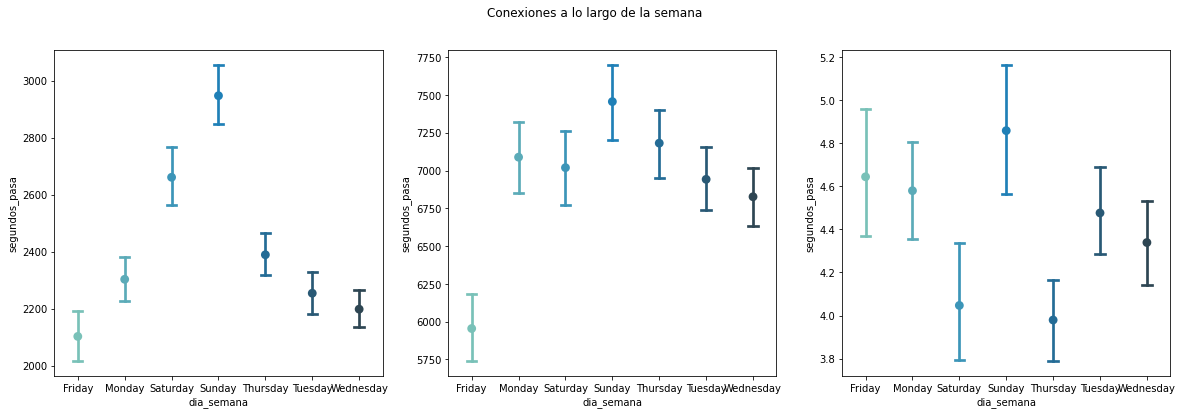

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=False)
fig.suptitle('Conexiones a lo largo de la semana')

sns.pointplot(x="dia_semana", y="segundos_pasa",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=1, ax=axes[0],
                data=datos)
sns.pointplot(x="dia_semana", y="segundos_pasa",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=1, ax=axes[1],
                data=datos_cliente)
sns.pointplot(x="dia_semana", y="segundos_pasa",
                capsize=.2, palette="YlGnBu_d", height=6, aspect=1, ax=axes[2],
                data=datos_no_cliente)

A pesar de que el día clave es el domingo,los patrones entre las conexiones de los visitantes y no visitantes también varia a lo largo de la semana, vamos a ver que pasa por sucursal y por mes

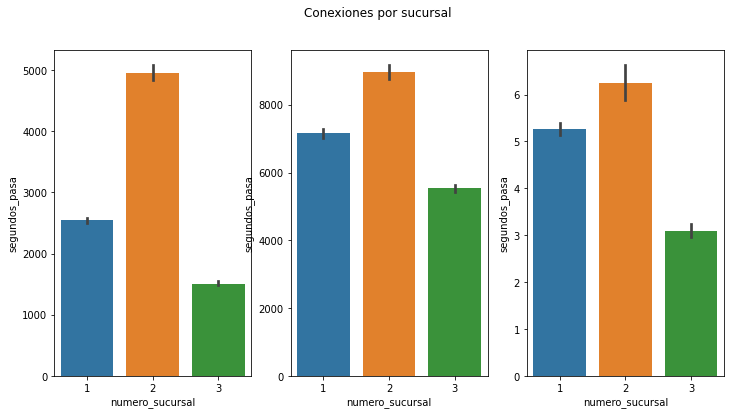

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=False)
fig.suptitle('Conexiones por sucursal')

sns.barplot(x="numero_sucursal", y="segundos_pasa",
                ax=axes[0],
                data=datos)

sns.barplot(x="numero_sucursal", y="segundos_pasa",
                ax=axes[1],
                data=datos_cliente)

sns.barplot(x="numero_sucursal", y="segundos_pasa",
                ax=axes[2],
                data=datos_no_cliente)

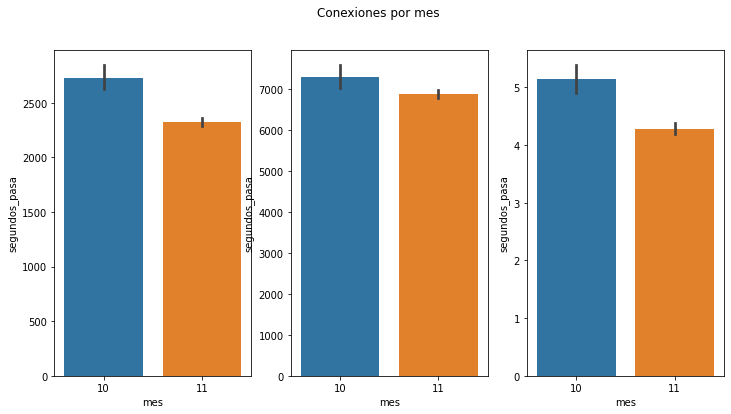

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=False)
fig.suptitle('Conexiones por mes')

sns.barplot(x="mes", y="segundos_pasa",
                ax=axes[0],
                data=datos)

sns.barplot(x="mes", y="segundos_pasa",
                ax=axes[1],
                data=datos_cliente)

sns.barplot(x="mes", y="segundos_pasa",
                ax=axes[2],
                data=datos_no_cliente)

No se ve que haya diferencia por sucursal o por mes

Text(0.5, 1.0, 'Conexiones de Generales')

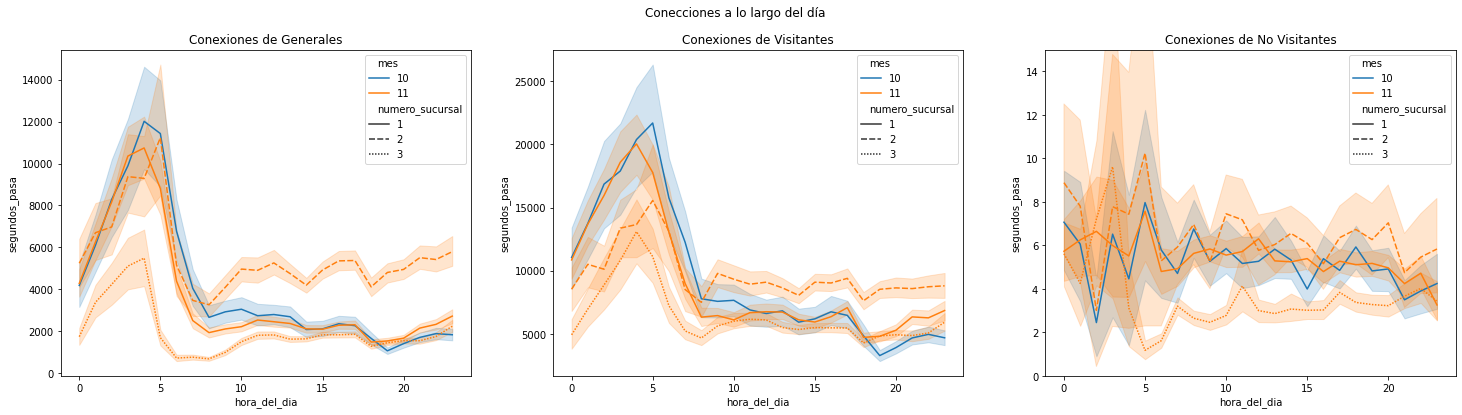

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6), sharey=False)
fig.suptitle('Conecciones a lo largo del día')


sns.lineplot(x="hora_del_dia", y="segundos_pasa",ax=axes[0],
             data= datos, hue="mes",style="numero_sucursal")

sns.lineplot(x="hora_del_dia", y="segundos_pasa",ax=axes[1],
             data= datos_cliente, hue="mes",style="numero_sucursal")


sns.lineplot(x="hora_del_dia", y="segundos_pasa",ax=axes[2],
             data= datos_no_cliente, hue="mes",style="numero_sucursal")

axes[2].set_ylim(0,15)

axes[2].set_title("Conexiones de No Visitantes")
axes[1].set_title("Conexiones de Visitantes")
axes[0].set_title("Conexiones de Generales")

De manera general no encontramos diferencias significativas en los patrones de todas las variables (salvo que del mes 10 solo se tiene datos de la sucursal 1), sin embargo de entrada los tomaremos para el modelo (numero_sucursal,dia_semana,hora_del_dia,segundos_pasa) y predecir si es o no visitante

## 4.- Modelado

En machine learning existen varios modelos de clasificación, entre ellos están; bosques aleatorios, árbol de decisiones, maquina vector soporte, k vecinos más cercanos, regresión logística multinominal etc. <br> Lo ideal es probar varios y elegir el mejor comparando su precisión. <br> En esta ocasión usaremos sólo dos de ellos y una red neuronal para tratar de predecir si es o si no es visitante

In [ ]:
#agregamos una nueva columna visitante o no visitante
datos['visitante1'] = np.where(datos['visitante']==True, 'visitante', 'no_visitante')
print(datos)

       numero_sucursal mes numero_dia  ... visitante segundos_pasa    visitante1
0                    1  11          2  ...      True          2676     visitante
1                    1  11          2  ...      True          2676     visitante
2                    1  10         30  ...     False             0  no_visitante
3                    1  11         13  ...      True          2272     visitante
4                    3  11          4  ...     False             0  no_visitante
...                ...  ..        ...  ...       ...           ...           ...
249551               1  11         30  ...      True         50152     visitante
249552               1  11         30  ...      True         50152     visitante
249553               1  11         30  ...      True         50152     visitante
249554               1  11         30  ...      True         50152     visitante
249555               1  11         30  ...      True         50152     visitante

[249556 rows x 8 columns]


In [ ]:
#quitamos numero_dia porque ya lo tenemos como día_semana, y quitamos mes porque el mes 10 solo hay datos de la sucursal 1
datosdf=datos.drop(['mes',"numero_dia","visitante"],axis=1)
datosdf.head(8)

,numero_sucursal,dia_semana,hora_del_dia,segundos_pasa,visitante1
0,1,Wednesday,0,2676,visitante
1,1,Wednesday,1,2676,visitante
2,1,Sunday,20,0,no_visitante
3,1,Sunday,12,2272,visitante
4,3,Friday,19,0,no_visitante
5,3,Thursday,5,0,no_visitante
6,2,Friday,19,0,no_visitante
7,3,Saturday,17,0,no_visitante


In [ ]:
#Necesitamos usar variables ficticias para hacer el ejercicio
df_X = datosdf.drop('visitante1', axis=1)
df_X = pd.get_dummies(df_X)

In [ ]:
#declaramos cual va a ser mi variable dependiente y cuales mis independientes
X = df_X.values
y = datosdf['visitante1']

In [ ]:
#segmentamos en test y train
from sklearn.model_selection import train_test_split #traemos libreria para segmentar
#separamos los datos de entrenamiento y prueba 80-20
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) #,random_state=25 #semilla 25
print("son {} datos para entrenamiento y {} datos para prueba".format(X_train.shape[0],X_test.shape[0]))

son 199644 datos para entrenamiento y 49912 datos para prueba


Primer algoritmo **Regresión Logística**

In [ ]:
from sklearn.linear_model import LogisticRegression #traemos parte de libreria para regresión logística

#hacemos el entrenamiento de regresión logística
algoritmoRL=LogisticRegression()
algoritmoRL.fit(X_train,y_train)
Y_predRL=algoritmoRL.predict(X_test)

print("Precisión Regresión Logística\nCon entrenamiento:{}".format(algoritmoRL.score(X_train,y_train)))

print("\nPrecisión Regresión Logística\nCon test:{}".format(algoritmoRL.score(X_test,y_test)))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Precisión Regresión Logística
Con entrenamiento:0.9629189958125464

Precisión Regresión Logística
Con test:0.9621333547042795


In [ ]:
print("Matriz de Confusión de Regresión Logística")
print(pd.crosstab(y_test,Y_predRL)) #row->test #col->predichos

Matriz de Confusión de Regresión Logística
col_0         no_visitante  visitante
visitante1                           
no_visitante         32406        487
visitante             1403      15616


Segundo Algoritmo **K vecinos más cercanos**

In [ ]:
#con k Vecimos mas cercanos
from sklearn.neighbors import KNeighborsClassifier

algoritmoVecinos=KNeighborsClassifier(n_neighbors=3) #por defecto pone 5
algoritmoVecinos.fit(X_train,y_train)
Y_predVecinos=algoritmoVecinos.predict(X_test)

print("Precisión k Vecinos\nCon entrenamiento:{}".format(algoritmoVecinos.score(X_train,y_train)))

print("\nPrecisión k Vecinos\nCon test:{}".format(algoritmoVecinos.score(X_test,y_test)))

Precisión k Vecinos
Con entrenamiento:0.9743994309871571

Precisión k Vecinos
Con test:0.9552612598172784


In [ ]:
print("Matriz de Confusión con k Vecinos")
print(pd.crosstab(y_test,Y_predVecinos)) #row->test #col->predichos

Matriz de Confusión con k Vecinos
col_0         no_visitante  visitante
visitante1                           
no_visitante         31860       1033
visitante             1200      15819


Tercer Algoritmo **Red Neuronal**

In [ ]:
#para transformarlos en número si es que son string
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
#prepocesamiento de datos
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(solver='sgd',
                  alpha=1e-5,
                  hidden_layer_sizes=(5,5,5),
                  random_state=8,
                  max_iter=1000)
mlp.fit(X_train,y_train)
print(mlp.score(X_train,y_train))

print(mlp.score(X_test,y_test))

0.9610005810342409
0.9608711331944222


In [ ]:
Y_predRed=mlp.predict(X_test)
print("Matriz de Confusión con Red")
print(pd.crosstab(y_test,Y_predRed)) #row->test #col->predichos

Matriz de Confusión con Red
col_0         no_visitante  visitante
visitante1                           
no_visitante         32454        439
visitante             1514      15505


**La mejor precisión la regresión logística, vamos a usarla para predecir nuevos valores**

In [ ]:
#vemos como era la estructura con la que estuvimos trabajando
datosdf.head(10)

,numero_sucursal,dia_semana,hora_del_dia,segundos_pasa,visitante1
0,1,Wednesday,0,2676,visitante
1,1,Wednesday,1,2676,visitante
2,1,Sunday,20,0,no_visitante
3,1,Sunday,12,2272,visitante
4,3,Friday,19,0,no_visitante
5,3,Thursday,5,0,no_visitante
6,2,Friday,19,0,no_visitante
7,3,Saturday,17,0,no_visitante
8,1,Saturday,16,0,no_visitante
9,1,Tuesday,11,0,no_visitante


In [ ]:
#traemos la nueva base de datos
url="https://raw.githubusercontent.com/armandovl/devf_test_sensei/main/datasets/v.csv"
nuevos=pd.read_csv(url)
nuevos.head(8)

,Unnamed: 0,device_mac,branch_office,month_tz,day_tz,day_of_week_tz,hour_tz,tiempodeses
0,1,a8:81:95:56:31:3c,1,11,17,Thursday,4,0
1,2,44:6e:e5:1b:68:81,3,11,3,Thursday,22,477
2,3,0c:b3:19:10:78:17,3,11,12,Saturday,10,0
3,4,44:74:6c:0a:20:23,3,11,27,Sunday,21,0
4,5,ac:5f:3e:c8:dc:35,1,11,27,Sunday,16,0
5,6,7c:f9:0e:63:f9:07,1,10,29,Saturday,14,284
6,7,a4:77:33:80:f0:90,1,11,16,Wednesday,19,1857
7,8,e8:b4:c8:a2:33:dd,3,11,9,Wednesday,11,0


In [ ]:
#reacomodamos los datos antes de pasarles el algoritmo
nuevos=nuevos.drop(['Unnamed: 0','device_mac','month_tz','day_tz'],axis=1)
nuevos.head(8)

,branch_office,day_of_week_tz,hour_tz,tiempodeses
0,1,Thursday,4,0
1,3,Thursday,22,477
2,3,Saturday,10,0
3,3,Sunday,21,0
4,1,Sunday,16,0
5,1,Saturday,14,284
6,1,Wednesday,19,1857
7,3,Wednesday,11,0


In [ ]:
nuevos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   branch_office   90000 non-null  int64 
 1   day_of_week_tz  90000 non-null  object
 2   hour_tz         90000 non-null  int64 
 3   tiempodeses     90000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ MB


In [ ]:
#categorizamos las variables
nuevos['branch_office'] = nuevos['branch_office'].astype('category')
nuevos['day_of_week_tz'] = nuevos['day_of_week_tz'].astype('category')
nuevos['hour_tz'] = nuevos['hour_tz'].astype('category')

In [ ]:
#usamos nuevamente variables ficticias
nuevos = pd.get_dummies(nuevos)

In [ ]:
#lo transformamos en un arreglos
nuevos=np.array(nuevos)

In [ ]:
nuevos

array([[  0,   1,   0, ...,   0,   0,   0],
       [477,   0,   0, ...,   0,   1,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   1,   0, ...,   0,   0,   0]])

In [ ]:
#hacemos las predicciones con el algoritmo seleccionado
predicciones1=algoritmoRL.predict(nuevos)
print(predicciones1)

['no_visitante' 'visitante' 'no_visitante' ... 'no_visitante'
 'no_visitante' 'no_visitante']


In [ ]:
#traemos la base de datos a la cual le vamos a agregar la nueva columna
url="https://raw.githubusercontent.com/armandovl/devf_test_sensei/main/datasets/v.csv"
nuevos2=pd.read_csv(url)

In [ ]:
#agregamos la columna con predicciones
datos_con_predicciones=nuevos2.assign(predicciones_visitante=predicciones1)
datos_con_predicciones.head(19)

,Unnamed: 0,device_mac,branch_office,month_tz,day_tz,day_of_week_tz,hour_tz,tiempodeses,predicciones_visitante
0,1,a8:81:95:56:31:3c,1,11,17,Thursday,4,0,no_visitante
1,2,44:6e:e5:1b:68:81,3,11,3,Thursday,22,477,visitante
2,3,0c:b3:19:10:78:17,3,11,12,Saturday,10,0,no_visitante
3,4,44:74:6c:0a:20:23,3,11,27,Sunday,21,0,no_visitante
4,5,ac:5f:3e:c8:dc:35,1,11,27,Sunday,16,0,no_visitante
5,6,7c:f9:0e:63:f9:07,1,10,29,Saturday,14,284,visitante
6,7,a4:77:33:80:f0:90,1,11,16,Wednesday,19,1857,visitante
7,8,e8:b4:c8:a2:33:dd,3,11,9,Wednesday,11,0,no_visitante
8,9,e0:98:61:b0:99:e1,3,11,15,Tuesday,7,0,no_visitante
9,10,a4:70:d6:bb:fe:c0,3,11,4,Friday,14,224,visitante


In [ ]:
#la exportamos como csv
datos_con_predicciones.to_csv(r'ejercicio_devf_predicciones.csv', index = False, header=True)

**Podemos probar cambiando los parámetros de los algoritmos (cómo el número de vecinos en k vecinos cercanos) , probando más algoritmos (random forest, maquina vector soporte etc) , probar con otros métodos de remuestreo (validación cruzada o bootstrapping), pero se considera que nuestro algoritmo da una buena presición y para fines de ejercicio esta bien y esos temas se pueden retomar en alguna clase formal. <br>
Agradezco la oportunidad y me divertí mucho haciendo este pequeño reto!!!, saludos**